## Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

##InvoiceNo — номер транзакции
##StockCode — код товара
##Description — описание товара
##Quantity — количество единиц товара, добавленных в заказ
##InvoiceDate — дата транзакции 
##UnitPrice — цена за единицу товара
##CustomerID — id клиента
##Country — страна, где проживает клиент

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

### 1. В данной задаче ссылка для считывания данных лежит в переменной path_to_file.
### Импортируйте пандас и прочитайте данные с кодировкой ISO-8859-1. Запишите полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns.

In [ ]:
retail = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/5_data.csv.zip', encoding='ISO-8859-1', compression='zip')

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### 2. Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail.

In [ ]:
retail.duplicated().sum()

5268

In [ ]:
retail = retail.drop_duplicates()

In [ ]:
retail['canceled_transaction']= retail['InvoiceNo'].str.startswith('C')

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False


In [ ]:
retail['canceled_transaction'].sum()

9251

In [ ]:
retail = retail[retail['Quantity'] > 0]

In [ ]:
retail.shape

(526054, 9)

### 3. Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id).

### Отфильтрованные данные записаны в retail. Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.

In [ ]:
germany_customers = retail.groupby(['CustomerID', 'Country'], as_index=False) \
.agg({'InvoiceNo': 'nunique'}) \
.query('Country == "Germany"') \
.rename(columns={'InvoiceNo': 'orders',}) \
.sort_values('orders', ascending=False)

In [ ]:
germany_customers.head()

,CustomerID,Country,orders
185,12569.0,Germany,32
108,12471.0,Germany,30
312,12720.0,Germany,25
231,12621.0,Germany,20
111,12474.0,Germany,18


In [ ]:
quant_80 = germany_customers['orders'].quantile(q=0.8)

In [ ]:
quant_80

7.0

In [ ]:
germany_top = germany_customers[germany_customers['orders'] > quant_80]['CustomerID']

### 4. Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany.

In [ ]:
retail[retail['CustomerID'].isin(germany_top)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_transaction
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany,False
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany,False
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany,False
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany,False
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany,False
...,...,...,...,...,...,...,...,...,...
541726,581570,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,12/9/2011 11:59,4.95,12662.0,Germany,False
541727,581570,23077,DOUGHNUT LIP GLOSS,20,12/9/2011 11:59,1.25,12662.0,Germany,False
541728,581570,20750,RED RETROSPOT MINI CASES,2,12/9/2011 11:59,7.95,12662.0,Germany,False
541729,581570,22505,MEMO BOARD COTTAGE DESIGN,4,12/9/2011 11:59,4.95,12662.0,Germany,False


In [ ]:
top_retail_germany = retail[retail['CustomerID'].isin(germany_top)]

### 5. Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? 

Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.

In [ ]:
top_retail_germany.groupby('StockCode').agg({'Description': 'count'}).sort_values('Description', ascending=False)

,Description
StockCode,
POST,213
22326,52
22328,38
22423,34
20719,30
...,...
22563,1
22569,1
22574,1


### 6. Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.

In [ ]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_transaction,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,False,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,False,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,False,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,False,16.60


### 6. Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)

In [ ]:
retail.groupby('InvoiceNo', as_index=False).agg({'Revenue': 'sum'}).sort_values('Revenue', ascending=False)['InvoiceNo'].head(5).tolist()

['581483', '541431', '574941', '576365', '556444']

# Минипроект

### Задачи
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
Сколько транзакций завершились ошибкой?
Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.
Описание данных
Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
name – имя пользователя
transaction – статус транзакции
minute* – сколько минут прошло с начала дня

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/transaction_data.csv')

In [ ]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [ ]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [ ]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [ ]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

<Axes: >

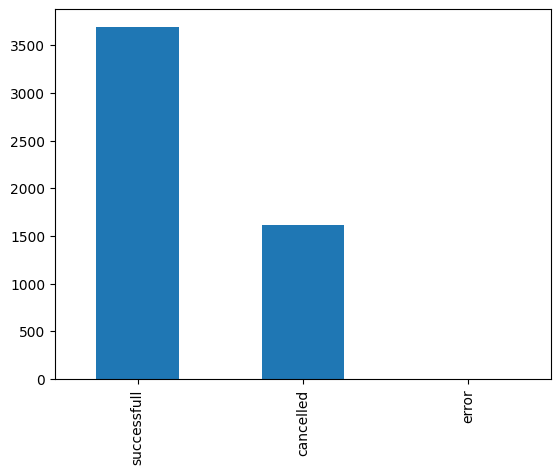

In [ ]:
df['transaction'].value_counts().plot(kind='bar')

In [ ]:
df['transaction'].value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [ ]:
distribution = df[df['transaction'] == 'successfull'].groupby('name', as_index=False).agg({'date': 'count'})

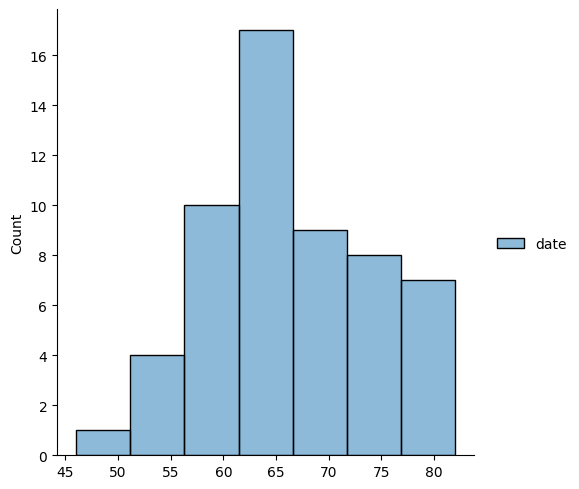

In [ ]:
sns.displot(distribution)

In [ ]:
distribution.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [ ]:
update_df = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/transaction_data_updated.csv')

In [ ]:
update_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [ ]:
update_df \
.groupby(['name', 'minute'], as_index=False) \
.agg({'date': 'count'}) \
.rename(columns={'date': 'success_order'}) \
.pivot(index='minute', columns='name', values='success_order').fillna(0)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [ ]:
update_df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [ ]:
update_df['date'] = pd.to_datetime(update_df['date'])

In [ ]:
update_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [ ]:
update_df['true_minute'] = update_df['date'].dt.hour * 60 + update_df['minute']

In [ ]:
update_df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


<Axes: xlabel='true_minute'>

<Figure size 1200x800 with 0 Axes>

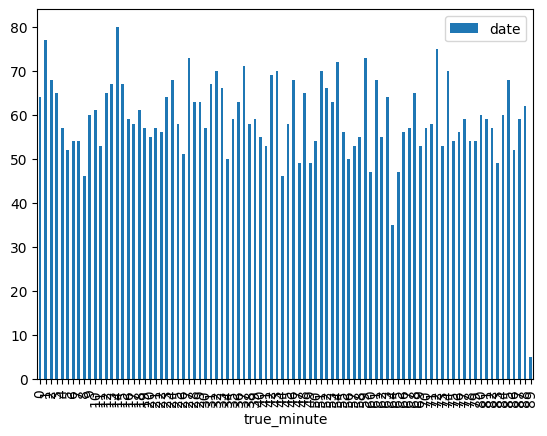

In [ ]:
plt.figure(figsize=(12, 8))
update_df.groupby('true_minute', as_index=False).agg({'date': 'count'}).plot(kind='bar',x='true_minute', y='date')

<Axes: xlabel='true_minute', ylabel='date'>

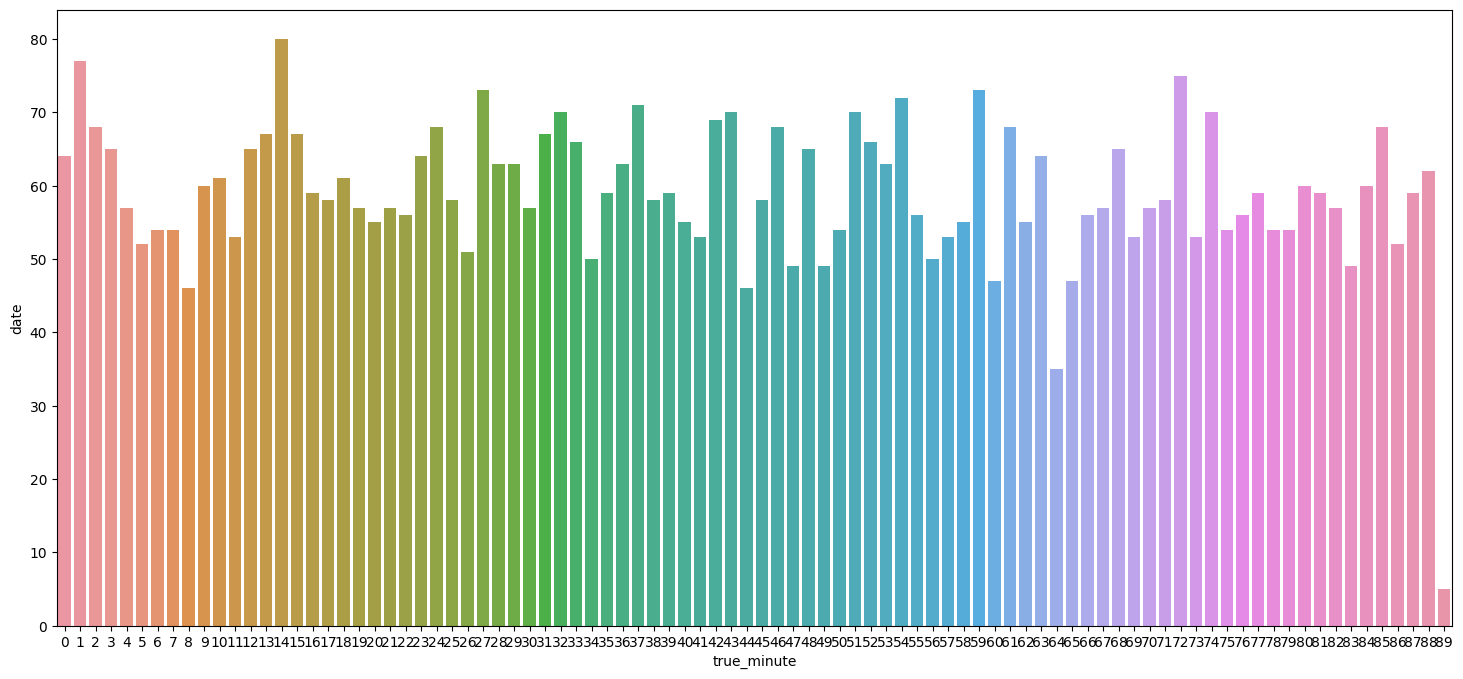

In [ ]:
plt.figure(figsize=(18, 8))
sns.barplot(data=update_df.groupby('true_minute', as_index=False).agg({'date': 'count'}), x='true_minute', y='date')

# Дополнительный проект

In [ ]:
tm1 = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/subsid/tm_sales_1.csv', sep=';')
tm2 = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/subsid/tm_sales_2.csv', sep=';')
tm3 = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/subsid/tm_sales_3.csv', sep=';')
logs = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/subsid/prod_activations_logs.csv', sep=';')

In [ ]:
tm1

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25


In [ ]:
tm2 = tm2.dropna()
tm2

,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,17-03-2020 10:17
2,7,8362218,9879,05-03-2020 11:42
3,2,2185490,3210,16-03-2020 16:28


In [ ]:
tm3

,FILIAL_ID,PROD_ID,SUBS_ID,ACT_DTTM
0,3,1499,id5764122,18-03-2020 15:44
1,6,3020,id7642700,15-03-2020 14:21
2,2,5677,id1374509,17-03-2020 11:48


In [ ]:
tm_list = [tm1, tm2, tm3]
tm = pd.concat(tm_list)
tm

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [ ]:
def add_id(id):
  if not id.startswith('id'):
    return f'id{id}'
  return id

In [ ]:
tm['SUBS_ID'] = tm['SUBS_ID'].apply(add_id)

In [ ]:
tm

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,id8362218,7,9879,05-03-2020 11:42
3,id2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [ ]:
logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [ ]:
logs.dtypes

SUBS_ID       object
PROD_ID        int64
START_DTTM    object
END_DTTM      object
dtype: object

In [ ]:
for col in ('START_DTTM', 'END_DTTM'):
  logs[col] = pd.to_datetime(logs[col], format='%d-%m-%Y %H:%M')

In [ ]:
logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00
5,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00
2,id7461794,3310,2020-03-20 17:25:00,2020-12-01 00:00:00
3,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00
4,id8238421,1859,2020-03-01 11:42:00,2020-03-01 11:43:00
3,id8641743,2752,2020-03-20 15:44:00,2020-04-21 15:44:00
2,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00
6,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00
2,id8741631,5677,2020-03-19 12:28:00,2020-12-01 00:00:00


In [ ]:
logs['time_delta'] = (logs['END_DTTM'] - logs['START_DTTM'])

In [ ]:
logs_5_min = logs[logs['time_delta'] > timedelta(minutes=5)]

In [ ]:
tm_with_logs = pd.merge(tm, logs_5_min, how='inner', on=['SUBS_ID', 'PROD_ID'])
tm_with_logs

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,time_delta
0,id4651830,1,1954,20-03-2020 14:59,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
1,id5416547,3,1743,17-03-2020 10:17,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
2,id2185490,2,3210,16-03-2020 16:28,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
3,id7642700,6,3020,15-03-2020 14:21,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [ ]:
tm_with_logs['SUBS_ID'].sort_values()

2    id2185490
0    id4651830
1    id5416547
3    id7642700
Name: SUBS_ID, dtype: object